> ## Download Dataset

In [ ]:
# create kaggle API first in your kaggle account

! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


In [ ]:
! kaggle datasets download -d volodymyrgavrysh/bank-marketing-campaigns-dataset

  0% 0.00/391k [00:00<?, ?B/s]
100% 391k/391k [00:00<00:00, 84.2MB/s]


In [ ]:
!unzip bank-marketing-campaigns-dataset.zip

Archive:  bank-marketing-campaigns-dataset.zip
  inflating: bank-additional-full.csv  


##Business Problem Understanding
###Latar Belakang
Enigma Think Tank sebagai sebuah konsultan data scientist mendapatkan permintaan dari divisi marketing Bank Portugal sebagai klien dengan kebutuhan marketing campaign analysis untuk mengetahui karakteristik nasabah dan membuat sistem prediksi berbasis machine learning untuk lini bisnis deposito Bank Portugal.  

###Problem Statement :
Permasalahan yang dihadapi oleh klien adalah Marketing Campaign yang tidak optimal (Subscription Rate = 10,8%) yang mengakibatkan tidak efisien dari segi cost dan revenue. Cost atau biaya disini adalah biaya untuk melakukan panggilan telepon kepada customer serta upah telemarketer (manpower). Adapun dataset ini dibuat pada tahun 2014, sementara untuk data didalamnya dikumpulkan pada rentang waktu mei 2008 sampai juni 2013. Pada tahun tersebut salah satu cara untuk melakukan promosi adalah dengan melakukan panggilan telepon. Permasalahan ini perlu diselesaikan karena data ini dikumpulkan ketika terjadi krisis tahun 2008 sehingga industri perbankan perlu melakukan promosi secara efektif dan efisien untuk meminimalkan dampak dari krisis yang terjadi.

###Analytic Goals :
Dari permasalahan tersebut, harapannya sebagai data scientist dapat menghasilkan wawasan mendalam mengenai marketing campaign yang dilakukan untuk mengoptimalkan alokasi marketing cost dengan meningkatkan conversion rate-nya. Wawasan yang dimaksud antara lain kita dapat mengetahui karakteristik nasabah yang berdampak pada conversion rate.

###Machine Learning Goals :
Membuat model machine learning yang mampu memprediksi calon nasabah yang akan subscribe ataupun tidak untuk mengoptimalkan marketing campaign deposito. Adapun untuk mengetahui metrik terbaik pada model machine learning agar dapat memberikan prediksi sesuai tujuan pembuatannya, maka pada notebook ini dilakukan perhitungan cost & revenue terlebih dahulu. 

#### **Simulation Cost & Revenue :**
Sebelum melakukan perhitungan Cost and Revenue, pertama-tama dilakukan perhitungan kemampuan kerja manpower dalam satu hari kerja:

*   Asumsi productivity manpower Work From Office minimum 29.8% (2 jam 23 menit) sampai 60% (4 jam 48 menit) sehingga rata-rata productivity manpower 44.9% (berdasarkan [Sumber](https://www.apollotechnical.com/employee-productivity-statistics/)).
*   Asumsi productivity manpower Work From Home / Freelancer (7 jam 12 menit, karena jam kerja dari rumah 36 jam per minggu 5 hari kerja) sehingga rata-rata productivity manpower 90.0% (berdasarkan [Sumber](https://www.apollotechnical.com/employee-productivity-statistics/))
*   Asumsi untuk analisa ini adalah productivity manpower work from office karena pada tahun 2008-2013 belum ada work from home [Sumber](https://www.apollotechnical.com/employee-productivity-statistics/)).

Cost telemarketing terdiri dari beberapa elemen yaitu 
*   Asumsi menggunakan Vodafone karena operator terbaik di portugal (berdasarkan [Sumber](https://www.phonetravelwiz.com/vodafone-portugal-review/)). Biaya komunikasi telepon atau seluler (EUR 7.55 per jam) (berdasarkan [Sumber](https://www.smartone.com/mo/en/mobile-services/roaming/countryDetails.jsp?country_name=Portugal))
*   Manpower telemarketer (EUR 60 per 8 jam) ([Source](https://www.guru.com/d/freelancers/skill/telemarketing/l/portugal/))
* Total Cost per hari = Cost Manpower Telemarketer + (Cost biaya telekomunikasi/hari * efisiensi kerja manpower * jam kerja) = EUR 60 + (EUR 7,55 * 44,9% * 8) = EUR 87,1196 per hari


Sementara, revenue dari lini bisnis deposito bank dihitung berdasarkan elemen-elemen dan perhitungan berikut :

* Kemampuan call perhari (offline) = productivity manpower (44.9%) * Jam Kerja (8 jam)(480 menit) / median duration (180 detik = 3 menit)  = 44.9% * 480 menit / 3 menit = 71,84 panggilan

* Productivity = prosentase jumlah customer subscribe * kemampuan call perhari = 10.8% * 71,84 = 7.8 customer/hari -> dengan 20 hari kerja per bulan, maka productivity menjadi 156 nasabah baru/bulan dan .

Dari 156 nasabah baru tersebut, kita asumsikan nasabah deposito berlangganan dengan rata-rata investasi dari range EUR 940 - EUR 4700 yaitu EUR 2800. Kemudian, kita asumsikan bank meenginvestasikan uang dari 50% jumlah nasabah tersebut dalam mencari profit melalui net interest margin (sebesar = 1,25%, [Source](https://www.mdpi.com/2071-1050/11/14/3785)) dan 50% lainnya diinvestasikan di pasar saham, namun dikarenakan sudah terlanjur investasi dilakukan pada pasar saham, bank mengalami kerugian rata-rata sebesar 11% pertahun ([Source](https://tradingeconomics.com/portugal/stock-market-return-percent-year-on-year-wb-data.html)), sehingga dilakukan pembobotan untuk masing-masing dari skema tersebut.

* Total revenue/bulan dari net interest margin= Bobot * Productivity * revenue? (net interest margin * asumsi rata-rata uang pelanggan untuk investasi deposito = 50% * 156 * 1,25% * EUR 2800 = EUR 2730/month = EUR 91/ day

* Total revenue/bulan dari saham = Bobot * Productivity * average revenue stock market portugal * deposit amount = 50% * 156 * (-11%) * EUR 2800 = - EUR 24.024/year = - EUR 2.002/ month = - EUR 66,73 / day

* Total Revenue per Day = EUR 91 + (- EUR 66,73) = EUR 24,27/day

* Dari perhitungan ini dapat dilihat jika jumlah Revenue jauh lebih kecil daripada cost dengan total revenue sebesar EUR 24,27/day sementara total cost sebesar EUR 87,12/day

###Metric Evaluation
Metric adalah cara untuk mengukur performa dari Machine Learning. Adapun penentuan metrik berdasarkan kepada variabel target dan tipe masalah yang timbul dari manfaat dan kerugian dalam mencapai target tersebut.

Variabel Target pada dataset ini adalah :
*   0 (no) -> Customer yang tidak subscribe term deposit
*   1 (yes)-> Customer yang subscribe term deposit

Tipe masalah yang kemudian muncul :
*   Type 1 Error : False Positive
Konsekuensi : Customer yang tidak subscribe term deposit mendapatkan promosi dari tim marketing sehingga membuat resource promosi yang telah dikeluarkan menjadi sia-sia karena salah sasaran 
*   Type 2 Error : False Negative
Konsekuensi : Customer yang subscribe term deposit tidak mendapatkan promosi dari tim marketing. Hal ini bisa membuat customer yang potensial mengurungkan niatnya untuk subscribe term deposit karena tidak mendapatkan promosi.

Dari konsekuensi kedua tipe error beserta hasil perhitungan cost dan revenue dapat diputuskan bahwa model diharapkan dapat meminimalisir False Positive (Type 1 Error) sehingga metrik yang digunakan untuk kasus ini adalah Precision.

Source:

*https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

*https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248

##Environment Setup

In [ ]:
# instalasi dython package

!pip install dython==0.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# instalasi category_encoders package

!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# === DataFrame === #
import numpy as np
import pandas as pd

# === Visualisasi === #
import seaborn as sns
import matplotlib.pyplot as plt

# === Preprocessing === #
import missingno
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import (RFE, 
                                       SelectKBest, 
                                       SelectPercentile, 
                                       SelectFromModel)

# === Model === #
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier

# === Model Selection === #
from sklearn.model_selection import (cross_val_score, 
                                     StratifiedKFold, 
                                     train_test_split)
from sklearn.model_selection import RandomizedSearchCV

# === Imbalance Handling === #
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# === Metrics === #
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             recall_score, 
                             precision_score, 
                             classification_report, 
                             f1_score, 
                             roc_auc_score)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings('ignore')

## Data Understanding

Sebelum melangkah lebih jauh untuk melakukan analisis data, terlebih dahulu kita perlu untuk mengerti data yang kita miliki. Pemahaman yang diperlukan antara lain untuk memahami makna setiap kolom/feature pada data yang kita punya.

In [ ]:
# Load Data

path = "bank-additional-full.csv"
df = pd.read_csv(path, sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# informasi dasar dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dari informasi tentang dataset diatas, beberapa informasi yang kita peroleh antara lain :
* Data terdiri dari 21 kolom dan 41188 baris.
* Data kita terdiri dari kolom numerik (int/float) dan kolom kategori (object).
* Dataset Terdiri dari 11 Data Kategorikal dan 9 Data Numerikal dan 1 Kolom Target (y).
* Terlihat dari data nahwa tidak ada kolom missing value. Tapi hal ini perlu diteliti lebih lanjut lagi karena berdasarkan sumber data, beberapa kolom dengan value *unknown* bisa diperlakukan sebagai missing value.


Selanjutnya kita ingin memeriksa jumlah unique value beserta unique value pada setiap kolom, sehingga kita bisa lebih memahami value-value yang ada pada setiap kolom.

In [ ]:
# setting supaya dataframe lebih lebar
pd.set_option('display.max_colwidth', -1)

# tempat menyimpan value
listItem = []

# simpan nama kolom, jumlah unique value, dan nilai unique valuenya
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()])

# simpan pada dataframe
tabel1Desc = pd.DataFrame(
    columns=['column_name', 'number_of_nique', 'unique_sample'],
    data=listItem
)

# see table
tabel1Desc

,column_name,number_of_nique,unique_sample
0,age,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,job,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
2,marital,4,"[married, single, divorced, unknown]"
3,education,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
4,default,3,"[no, unknown, yes]"
5,housing,3,"[no, yes, unknown]"
6,loan,3,"[no, yes, unknown]"
7,contact,2,"[telephone, cellular]"
8,month,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
9,day_of_week,5,"[mon, tue, wed, thu, fri]"


Terlihat dari unique value kolom `marital`, `education`, `default`, `housing`, dan `loan` terdapat value *unknown*. Value inilah yang berdasarkan sumber data bisa dianggap sebagai missing value. Untuk perlakuan terhadap value unknown ini akan teliti lanjut nantinya.

### Attribute Information

Berikut ini merupakan arti dari setiap kolom yang ada :


| Attribute | Data Type | Description |
| --- | --- | --- |
| age | Numerical | Umur customer |
| job | Categorical | Pekerjaan Customer |
| marital | Categorical | Status Pernikahan Customer |
| education | Categorical | Tingkat Pendidikan Customer |
| default | Categorical | Status Credit Customer yang Default |
| housing | Categorical | Status Cicilan Rumah Customer |
| loan | Categorical | Status Hutang Customer |
| contact | Categorical | Tipe contact (seluler atau telepone) |
| month | Categorical | Bulan Terakhir Kontak Customer |
| day of week | Categorical | Hari Terakhir Kontak Customer |
| duration | Numerical | Durasi terakhir Kontak (Dalam Satuan Detik) |
| campaign | Numerical | Berapa Kali Customer Dikontak Saat Masa Promosi |
| pdays | Numerical | Jumlah hari setelah customer terakhir dikontak (999 berarti customer tidak pernah dikontak sebelumnya) |
| previous | Numerical | Berapa Kali Customer Dikontak Sebelum Masa Promosi |
| poutcome | Categorical | Hasil dari Masa Promosi Sebelumnya ( 'failure','nonexistent','success') |
| emp.var.rate | Numerical | Variasi berapa banyak orang yang dipekerjakan atau dirumahkan karena pergeseran kondisi ekonomi - quarterly indicator |
| cons.price.idx | Numerical | Ukuran perubahan harga rata-rata dari waktu ke waktu untuk pasar barang dan jasa konsumen - monthly indicator |
| cons.conf.idx | Numerical | Indikator yang mengukur seberapa optimis atau pesimis konsumen tentang situasi keuangan yang diharapkan - monthly indicator |
| euribor3m | Numerical | Serangkaian suku bunga referensi yang diterbitkan oleh European Money Markets Institute - daily indicator |
| nr.employed  | Numerical | Jumlah pegawai - quarterly indicator |
| y | Categorical | no – Customer tidak subscribe term deposit, Yes – Customer subscribe term deposit |

Dari sumber tentang dataset, beberapa informasi tambahan yang kita miliki antara lain :

*   Dataset dapat diakses melalui url [source](https://archive.ics.uci.edu/ml/datasets/bank+marketing)
*   Dataset dibuat oleh Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) pada tahun 2014.
*   Data yang ada diambil pada interval tahun 2008-2013, sehingga analisis yang perlu kita lakukan sebaiknya harus relevan dengan kondisi zaman saat itu. 
*   Dataset digunakan pada penelitian S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
*   Dataset tersebut dilengkapi dengan tambahan 5 fitur social dan ekonomi (`emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`) yang didapatkan dari Banco de Portugal.
*   Pemilihan fitur pada dataset menggunakan metode semi-automatic feature selection yaitu gabungan dari wawancara domain expert (bank campaign manager) dan metode forward selection yang memilih 19 fitur dari 150 fitur yang ada.

## Explanatory Dataset Analysis (EDA)





Pada Exploratory Data Analysis, kita akan melakukan eksplorasi lebih lanjut tentang data yang kita miliki. Hal ini bertujuan agar kita mengetahui lebih dalam lagi tentang data ini.

###Statistik Deskriptif

Hal pertama yang perlu kita ketahui dari data adlah karakteristik dasarnya. Karakteristiknya bisa kita ketahui dari statistik deskriptif dari data, seperti nilai rata-rata, median, modus, dan sebagainya.

In [ ]:
#  statistik deskriptif kolom numerik
display(df.describe())

# statistik deskriptif kolom kategori
display(df.describe(include="O"))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


**ANALYSIS :**
* Kolom `pdays` (jumlah hari setelah customer di kontak) nilai maksimal-nya adalah 999. Nilai ini perlu dikonversi karena secara intuitif kita tahu bahwa nilai ini tidak wajar.
* Kolom `cons.cof.idx` memiliki value yang semuanya negatif.
* Interval (**min** dan **max**) dari data numerik memiliki nilai yang berbeda-beda.
* Bulan Mei adalah bulan yang paling sering muncul, dan hari kamis adalah hari yang paling sering muncul.
* Kebanyakan orang dari data memiliki tingkat pendidikan samapi universitas, yang berarti kebanyakan dari mereka adalah orang yang berpendidikan. Juga orang yang menikah lebih banyak, sehingga kebanyakan dari mereka adalah orang yang memiliki tanggungan.

### Univariate Variabel

In [ ]:
# memisahkan kolom numerik dan kategori

num_col = [col for col in df.columns if df[col].dtypes != "object"]
cat_col = [col for col in df.columns if df[col].dtypes == "object"]

#### Distribution for Numerical Columns

Selanjutnya kita perlu untuk mengetahui distribusi dari data numerik yang ada pada dataset. Distribusi ini berguna agar kita mengetahui kecenderungan nilai pada setiap data.

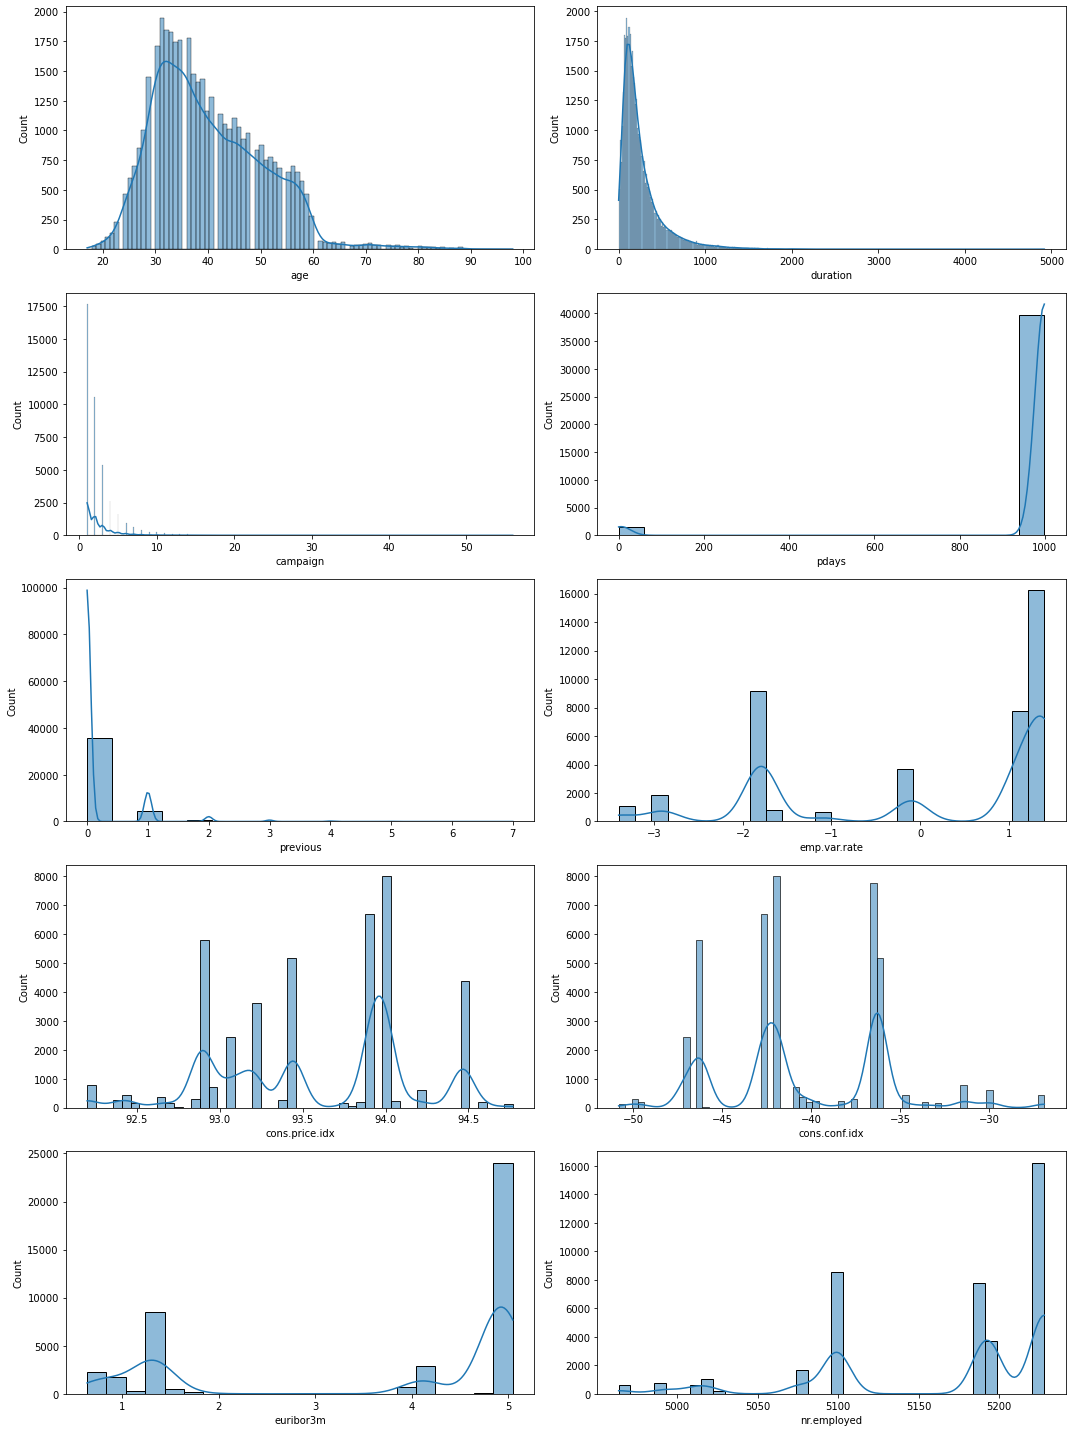

In [ ]:
i = 1
plt.figure(figsize=(15, 20))
for col in num_col:
  ax = plt.subplot(5, 2, i)
  sns.histplot(data = df, x = col, kde = True, ax = ax)
  plt.tight_layout()

  i += 1

**ANALYSIS**
* Terlihat bahwa interval pada data-data numerik diatas tidak sama, ada yang sampai ratusan dan bahkan ribuan. Sehingga diperlukan normalisasi untuk setiap kolom numerik supaya memiliki interval yang sama. Hal ini bertujuan agar tidak ada kolom numerik yang terlalu mendominasi.
* Terlihat bahwa persebaran data pada age duration dan campaign cenderung skewed right sehingga kemungkinan memiliki banyak outlier.
* Kolom `age` memiliki frequensi paling tinggi pada interval 30 sampai 35. Yang berarti kebanyakan orang yang dijadikan target promosi sedang berada diusia yang cukup produktif.
* Kolom `duration` memiliki postif skewness. Sehingga kebanyakan orang dari target promosi ditelpon kurang dari 5 menit (berdasarkan nilai mean).

#### Proportion for Categorical Columns

Selanjutnya kita perlu mengetahui proporsi dari setiap value pada setiap kolom. Sehingga kita bisa tahu value apa yang mendominasi dan tidak pada setiap kolom.

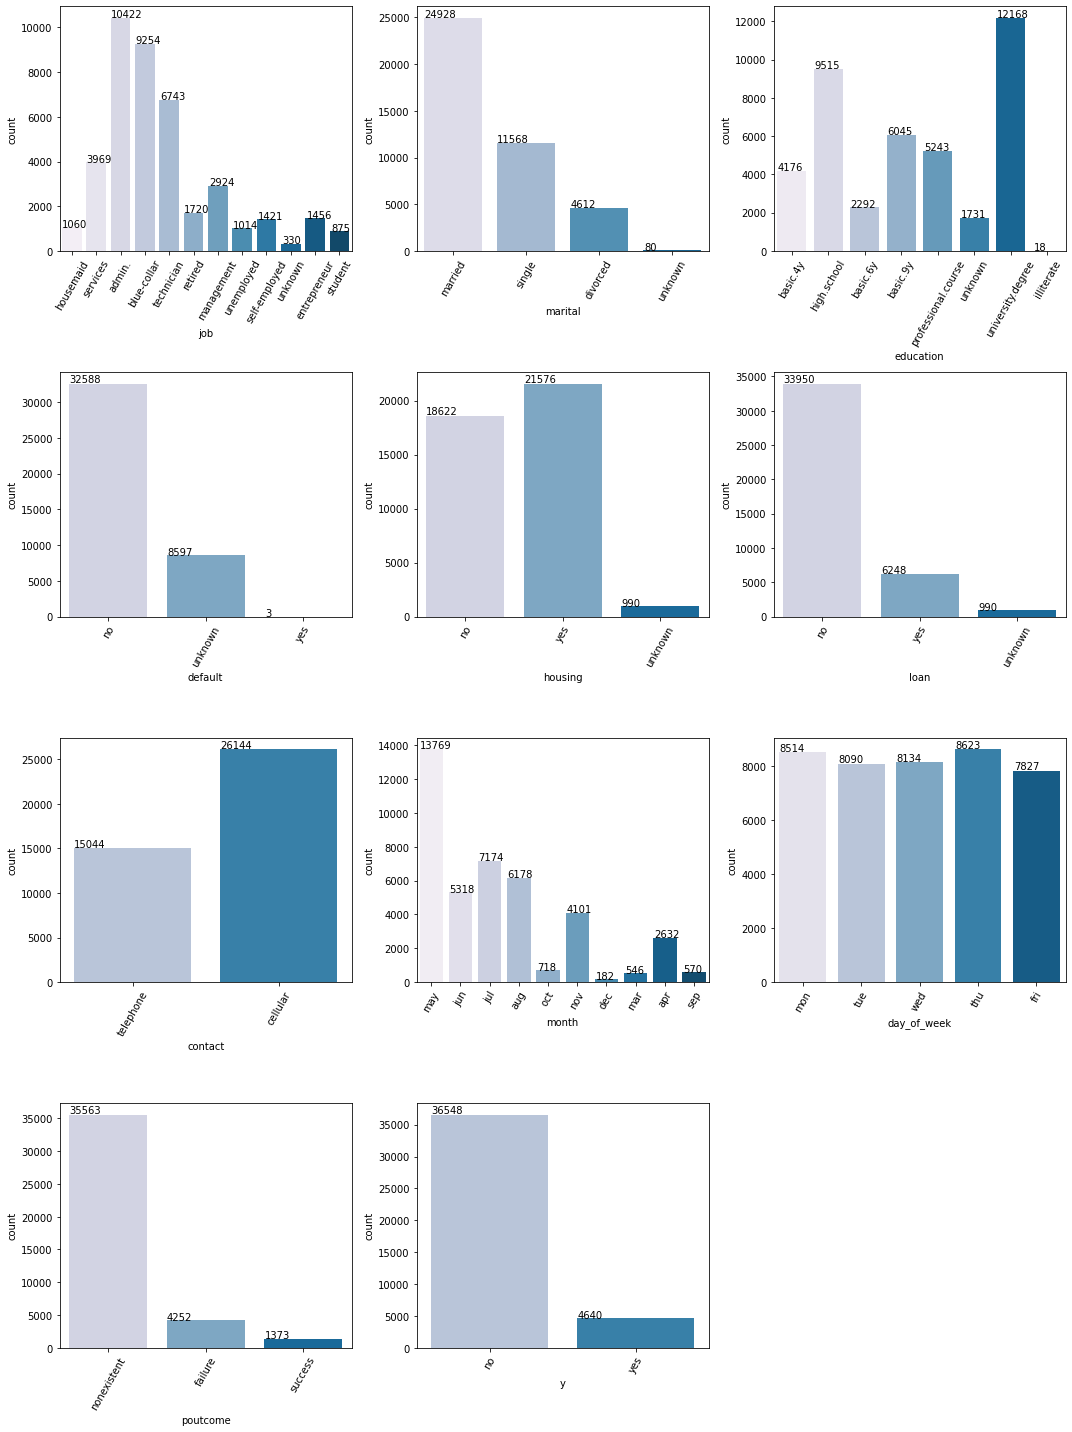

In [ ]:
i = 1
plt.figure(figsize=(15, 20))
for col in cat_col:
  ax = plt.subplot(4, 3, i)
  sns.countplot(data = df, x = col, palette = "PuBu", ax = ax)
  for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.005, p.get_height()*1.005))
  plt.xticks(rotation = 60)
  plt.tight_layout()

  i += 1

**ANALYSIS :**

Terdapat beberapa fitur yang sedikit menggambarkan market yang telah diapproach. 

* Secara umum calon nasabah didominasi oleh orang yang berpenghasilan, menikah dengan taraf pendidikan minimal lulus SMA. 

* Untuk dari segi tanggungan hutang didominasi oleh yang tidak memiliki masalah gagal bayar hutang (default) serta tidak memiliki cicilan KTA dengan sebagiannya dalam masa cicilan KPR.

* Secara umum campaign dilakukan menggunakan handphone dan dilakukan pada periode bulan mei-agustus. Adapun mayoritas dari calon nasabah yang dikontak pada campaign ini merupakan calon nasabah baru yang terlihat dari 'poutcome' dengan tingkat kesuksesan campaign sebelumnya untuk calon nasabah lama berada pada kisaran 30%.

* Kolom `y` adalah kolom target. Proporsi antara yes dan no cukup terlihat, ini berarti bahwa data yang kita punya termasuk Imbalance Dataset (Moderate Imbalance).

### Bivariate Variabel

Bivariate Variable Analysis dilakukan untuk mendapatkan insight apakah ada perbedaan karakteristik pada tiap kategori terhadap output subscribe/ tidak subscribenya nasabah.

#### Relation Between Target and Numerical Column

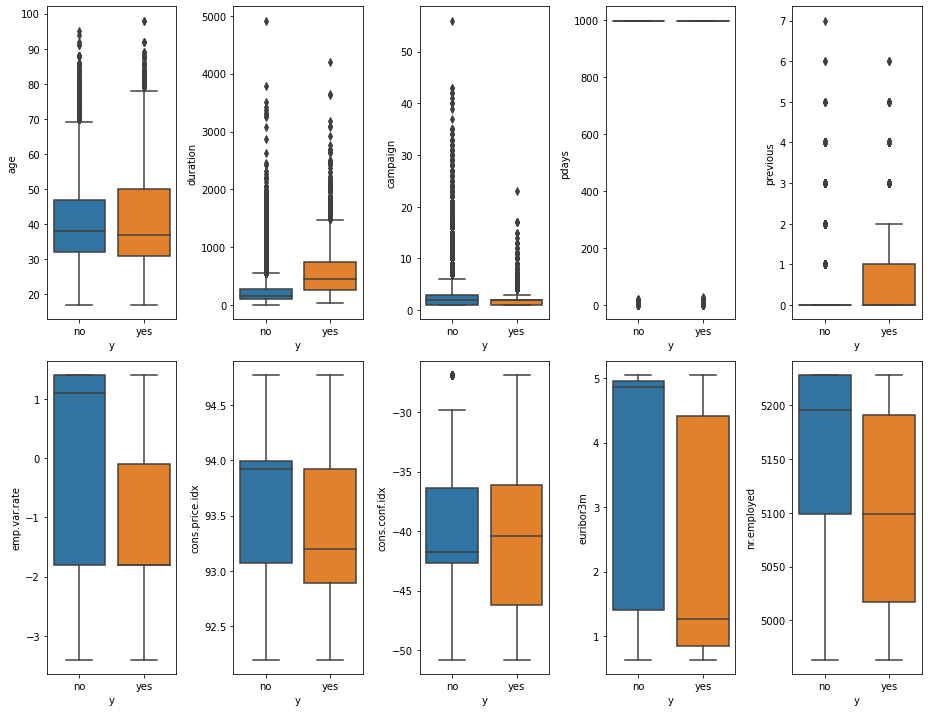

In [ ]:
i = 1
plt.figure(figsize=(13, 10))
for col in num_col:
  ax = plt.subplot(2, 5, i)
  sns.boxplot(data = df, y = col, x = "y", ax = ax)
  plt.tight_layout()

  i += 1

**ANALYSIS**

Dari analisis bivariate terdapat beberapa insight diantaranya:

* Subscription deposito lebih banyak terjadi pada calon nasabah dengan rentang usia yang lebih tua, rentang durasi telepon yang lebih lama juga berbanding lurus dengan jumlah subscription nasabah.

* Adanya pendekatan nasabah pada campaign sebelumnya bisa dikatakan tidak berpengaruh dikarenakan tingkat subscribtion dan distribusi data yang cenderung mirip. Sementara untuk intensitas kontak dengan calon nasabah pada campaign saat ini justru memberikan konversi yang rendah pada intensitas kontak yang lebih tinggi.

* Sementara untuk dari segi sosial ekonomi, rentang jangkauan tiap faktornya secara umum dimulai dari indeks yang lebih rendah, namun mayoritas konversi tetap terjadi pada angka indeks yang lebih tinggi daripada yang tidak melakukan subscribe deposito.





### Correlation Matrix

#### Correlation Between Attribute

Adapun untuk uji korelasi dilakukan untuk mengetahui hubungan antara seluruh variabel, baik variabel fitur maupun target.

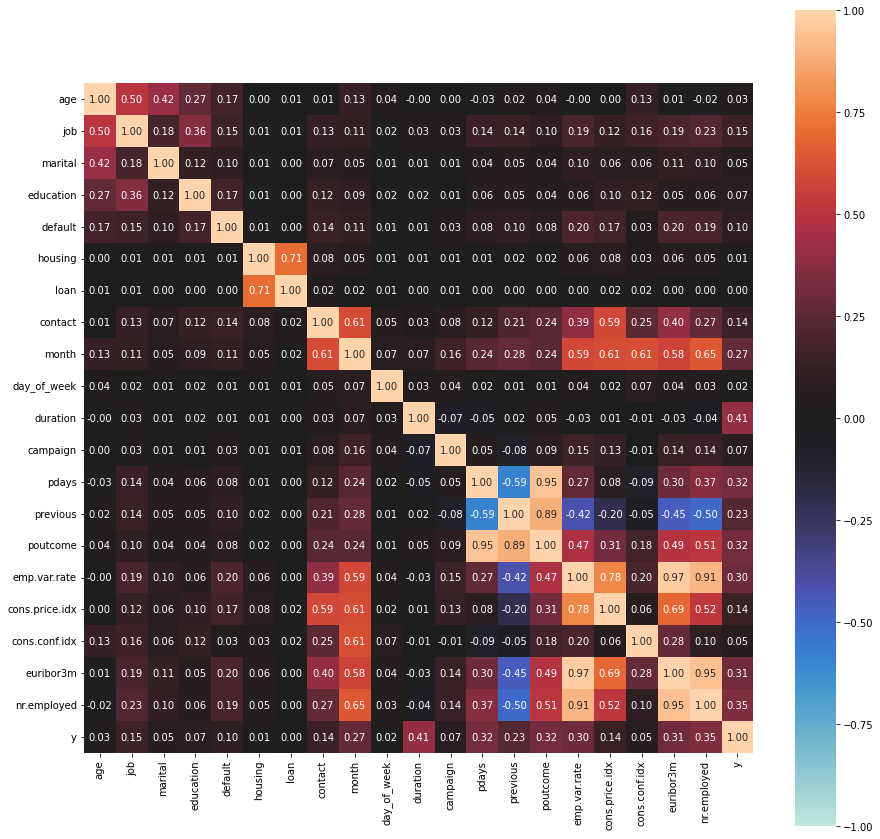

In [ ]:
from dython.nominal import associations
corr = associations(df, figsize=(15, 15))

Dari grafik korelasi diatas, dapat dilihat tidak ada satu fiturpun yang memiliki korelasi kuat terhadap variabel target. Korelasi tertinggi pada variabel duration pun masih bersifat menengah dengan angka 0,41. 

Adapun diluar korelasi dengan variabel target, variabel dalam konteks ekonomi sosial saling memilliki korelasi menengah dan kuat satu sama lain. Adapun hal ini wajar mengingat variabel-variabel tersebut digunakan sebagai indikator untuk mengukur kondisi ekonomi dan sosial pada suatu wilayah yang dihitung dalam waktu tertentu, sehingga sangat memungkinkan untuk saling terkait antara satu sama lain. 

Terbukti pula untuk variabel-variabel tersebut juga memiliki korelasi dengan bulan yang merupakan batasan waktu pengukuran indikator ekonomi sosial tersebut.

### Analysis Convertion Rate

Conversion rate adalah persentase user yang melakukan hal yang kita inginkan (sumber : [nngroup](https://www.nngroup.com/articles/conversion-rates/)). Dalam kasus ini, berarti conversion rate adalah persentase user yang subscribe term deposit. Analisis conversion rate akan memberikan kita insight tentang feature apa saja yang paling tinggi tingkat subscribe term deposit pada setiap kolom.

In [ ]:
# copy dataframe

df10 = df.copy()

####Convertion Rate Berdasarkan Age

Untuk kolom `age`, kita perlu binning terlebih dahulu karena kolom `age` berkaitan dengan marketing segmentation dimana secara umum terdapat perbedaan perilaku untuk target marketing pada rentang usia tertentu (sumber : [todayfounder](https://todayfounder.com/market-segmentation-by-age-the-complete-guide/)).

In [ ]:
# binning kolom age

batas_bin = [0, 30, 40, 50, 60, 70, 98]
kategori = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-98']
df10['AgeBin'] = pd.cut(df10['age'], bins=batas_bin, labels=kategori)

In [ ]:
# perhitungan conversion rate

cr_Age = df10[df10['y'] == 'yes']['AgeBin'].value_counts()
cr_Age = pd.DataFrame(cr_Age)
cr_Age['ConvertionRate'] = 0.0

for age in cr_Age.index:
    cr_Age['ConvertionRate'][age] = float(cr_Age['AgeBin'][age]/len(df10[df10['AgeBin'] == age])*100)

In [ ]:
cr_Age = cr_Age.sort_values(by = "ConvertionRate", ascending = False)
cr_Age

,AgeBin,ConvertionRate
71-98,202,47.867299
61-70,212,43.442623
0-30,1124,15.224164
51-60,668,10.653907
31-40,1597,9.746720
41-50,837,8.173828


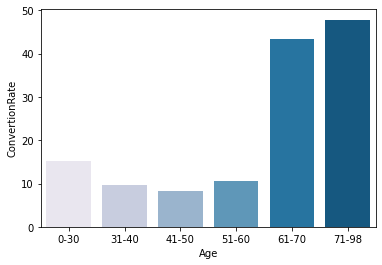

In [ ]:
sns.barplot(
    data = cr_Age, 
    x = cr_Age.index, 
    y = "ConvertionRate",
    palette = "PuBu"
)

plt.xlabel('Age');

Jika melihat diagram batang tentang conversion rate umur diatas, terlihat bahwa rentang umur diatas 60 tahun memiliki conversion rate yang paling tinggi yang dilanjutkan dengan interval umur dibawah 30 tahun pada posisi kedua.

####Convertion Rate Berdasarkan Job

In [ ]:
# Perhitungan conversion rate

jumlahConversionJob = df10[df10['y'] == 'yes']['job'].value_counts()
jumlahConversionJob = pd.DataFrame(jumlahConversionJob)
jumlahConversionJob['ConvertionRate'] = 0.0

for job in jumlahConversionJob.index:
    jumlahConversionJob['ConvertionRate'][job] = float(jumlahConversionJob['job'][job]/len(df10[df10['job'] == job])*100)

In [ ]:
jumlahConversionJob.sort_values('ConvertionRate', ascending=False)

,job,ConvertionRate
student,275,31.428571
retired,434,25.232558
unemployed,144,14.201183
admin.,1352,12.972558
management,328,11.217510
unknown,37,11.212121
technician,730,10.826042
self-employed,149,10.485574
housemaid,106,10.000000
entrepreneur,124,8.516484


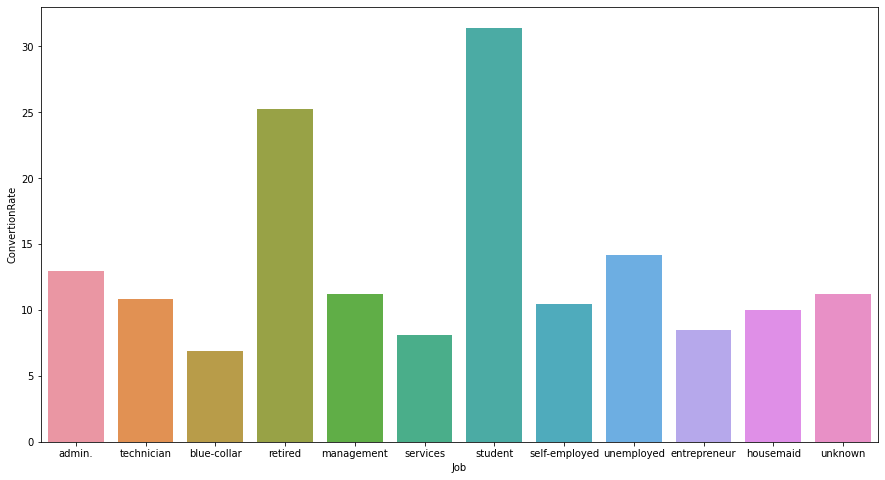

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data = jumlahConversionJob, x = jumlahConversionJob.index, y = jumlahConversionJob['ConvertionRate'])
plt.xlabel('Job');
plt.show()

Berdasarkan diagram batang diatas, kita bisa simpulkan bahwa golongan pekerjaan nasabah yang memiliki conversion rate paling tinggi adalah student, kemudian dilanjutkan dengan retired (pensiunan).

####Convertion Rate Berdasarkan Education

In [ ]:
jumlahConversionEdu = df10[df10['y'] == 'yes']['education'].value_counts()
jumlahConversionEdu = pd.DataFrame(jumlahConversionEdu)
jumlahConversionEdu['ConvertionRate'] = 0.0

for edu in jumlahConversionEdu.index:
    jumlahConversionEdu['ConvertionRate'][edu] = float(jumlahConversionEdu['education'][edu]/len(df10[df10['education'] == edu])*100)

In [ ]:
jumlahConversionEdu

,education,ConvertionRate
university.degree,1670,13.724523
high.school,1031,10.835523
professional.course,595,11.348465
basic.9y,473,7.824648
basic.4y,428,10.249042
unknown,251,14.500289
basic.6y,188,8.202443
illiterate,4,22.222222


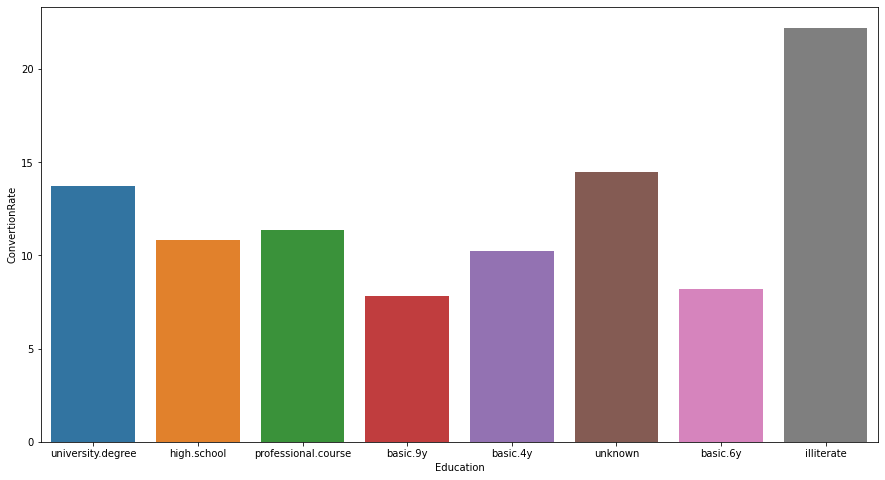

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data = jumlahConversionEdu, x = jumlahConversionEdu.index, y = jumlahConversionEdu['ConvertionRate'])
plt.xlabel('Education');
plt.show()

Berdasarkan diagram batang diatas, kita bisa simpulkan bahwa yang memiliki conversion rate paling tinggi adalah illiterate, kemudian dilanjutkan dengan unknown dan university degree.

####Convertion Rate Berdasarkan Credit Default

In [ ]:
jumlahConversionDefault = df10[df10['y'] == 'yes']['default'].value_counts()
jumlahConversionDefault = pd.DataFrame(jumlahConversionDefault)
jumlahConversionDefault['ConvertionRate'] = 0.0

for default in jumlahConversionDefault.index:
    jumlahConversionDefault['ConvertionRate'][default] = float(jumlahConversionDefault['default'][default]/len(df10[df10['default'] == default])*100)

In [ ]:
jumlahConversionDefault

,default,ConvertionRate
no,4197,12.878974
unknown,443,5.152960


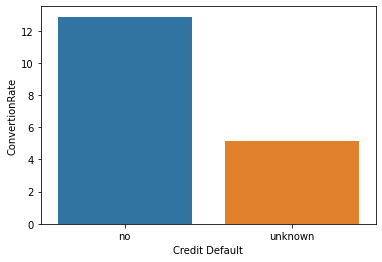

In [ ]:
sns.barplot(data = jumlahConversionDefault, x = jumlahConversionDefault.index, y = jumlahConversionDefault['ConvertionRate'])
plt.xlabel('Credit Default');

Dari komparasi nasabah yang mengalami default pada grafik diatas, dapat kita lihat bahwa default `no` memiliki conversion rate yang lebih tinggi dibandingkan dengan default `unknown`. Untuk kasus ini tentu sedikit anomali, karena kita tahu bahwa kolom default juga memiliki nilai `yes` tapi tidak memiliki conversion rate, yang berarti bahwa tidak ada default `yes` yang subscribe term deposit. Akan tetapi, hal tersebut dapat kita kesampingkan karena nasabah yang tidak memliki default credit memiliki conversion rate lebih dari 2 kali lipat dibandingkan yang tidak diketahui.

####Convertion Rate Berdasarkan Housing

In [ ]:
jumlahConversionHousing = df10[df10['y'] == 'yes']['housing'].value_counts()
jumlahConversionHousing = pd.DataFrame(jumlahConversionHousing)
jumlahConversionHousing['ConvertionRate'] = 0.0

for housing in jumlahConversionHousing.index:
    jumlahConversionHousing['ConvertionRate'][housing] = float(jumlahConversionHousing['housing'][housing]/len(df10[df10['housing'] == housing])*100)

In [ ]:
jumlahConversionHousing

,housing,ConvertionRate
yes,2507,11.619392
no,2026,10.879605
unknown,107,10.808081


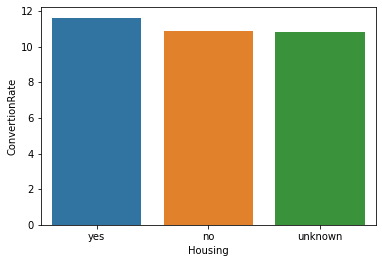

In [ ]:
sns.barplot(data = jumlahConversionHousing, x = jumlahConversionHousing.index, y = jumlahConversionHousing['ConvertionRate'])
plt.xlabel('Housing');

Ditinjau dari sisi conversion rate dari kepemilikan cicilan rumah, tidak ada pengaruh signifikan dan data bisa dikatakan bias dengan tingkat rate unknown yang secara prosentase berimbang dengan yes maupun no sehingga tidak bisa diketahui secara persis conversion rate akibat status kepemilikan kredit rumah.

####Convertion Rate Berdasarkan Personal Loan

In [ ]:
jumlahConversionloan = df10[df10['y'] == 'yes']['loan'].value_counts()
jumlahConversionloan = pd.DataFrame(jumlahConversionloan)
jumlahConversionloan['ConvertionRate'] = 0.0

for loan in jumlahConversionloan.index:
    jumlahConversionloan['ConvertionRate'][loan] = float(jumlahConversionloan['loan'][loan]/len(df10[df10['loan'] == loan])*100)

In [ ]:
jumlahConversionloan

,loan,ConvertionRate
no,3850,11.340206
yes,683,10.931498
unknown,107,10.808081


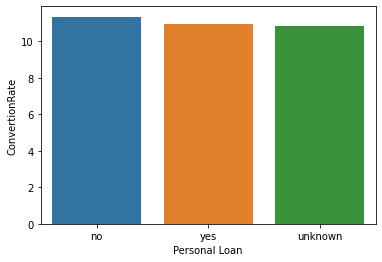

In [ ]:
sns.barplot(data = jumlahConversionloan, x = jumlahConversionloan.index, y = jumlahConversionloan['ConvertionRate'])
plt.xlabel('Personal Loan');

Untuk conversion rate dari kepemilikan cicilan pribadi memiliki kebiasan yang sama pada convertion rate dari status kepemilikan cicilan rumah akibat tingkat rate unknown yang secara prosentase berimbang dengan yes maupun no sehingga tidak bisa diketahui secara persis pengaruh status pinjaman pribadi terhadap conversion rate.

####Convertion Rate Berdasarkan Tipe Kontak

In [ ]:
jumlahConversioncontact = df10[df10['y'] == 'yes']['contact'].value_counts()
jumlahConversioncontact = pd.DataFrame(jumlahConversioncontact)
jumlahConversioncontact['ConvertionRate'] = 0.0

for contact in jumlahConversioncontact.index:
    jumlahConversioncontact['ConvertionRate'][contact] = float(jumlahConversioncontact['contact'][contact]/len(df10[df10['contact'] == contact])*100)

In [ ]:
jumlahConversioncontact

,contact,ConvertionRate
cellular,3853,14.737607
telephone,787,5.231321


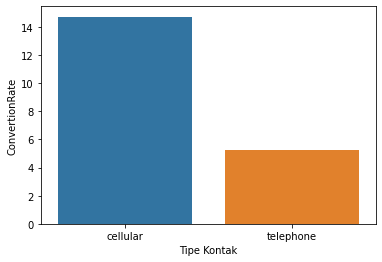

In [ ]:
sns.barplot(data = jumlahConversioncontact, x = jumlahConversioncontact.index, y = jumlahConversioncontact['ConvertionRate'])
plt.xlabel('Tipe Kontak');

Ditinjau dari segi komunikasi, convertion rate paling tinggi ada pada penggunaan handphone yang memiliki convertion rate sekitar 3 kali lebih besar daripada campaign penggunaan telepon.

####Convertion Rate Berdasarkan Bulan

In [ ]:
jumlahConversionmonth = df10[df10['y'] == 'yes']['month'].value_counts()
jumlahConversionmonth = pd.DataFrame(jumlahConversionmonth)
jumlahConversionmonth['ConvertionRate'] = 0.0

for month in jumlahConversionmonth.index:
    jumlahConversionmonth['ConvertionRate'][month] = float(jumlahConversionmonth['month'][month]/len(df10[df10['month'] == month])*100)

In [ ]:
jumlahConversionmonth

,month,ConvertionRate
may,886,6.434745
aug,655,10.602137
jul,649,9.046557
jun,559,10.511470
apr,539,20.478723
nov,416,10.143867
oct,315,43.871866
mar,276,50.549451
sep,256,44.912281
dec,89,48.901099


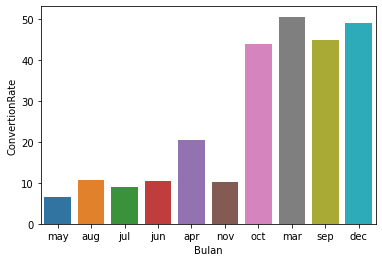

In [ ]:
sns.barplot(data = jumlahConversionmonth, x = jumlahConversionmonth.index, y = jumlahConversionmonth['ConvertionRate'])
plt.xlabel('Bulan');

Untuk pengaruh conversion rate dari pengaruh bulan pengadaan campaign memberikan conversion rate yang cukup tinggi pada bulan maret, diikuti dengan bulan desember, september, dan oktober dengan convertion rate hingga menembus angka sekitar 45-50%. Diikuti bulan april dengan angka 20,5%, lalu untuk bulan lainnya hanya berkisar pada kisaran 6-10% saja.

####Convertion Rate Berdasarkan Hari

In [ ]:
jumlahConversionday_of_week = df10[df10['y'] == 'yes']['day_of_week'].value_counts()
jumlahConversionday_of_week = pd.DataFrame(jumlahConversionday_of_week)
jumlahConversionday_of_week['ConvertionRate'] = 0.0

for day_of_week in jumlahConversionday_of_week.index:
    jumlahConversionday_of_week['ConvertionRate'][day_of_week] = float(jumlahConversionday_of_week['day_of_week'][day_of_week]/len(df10[df10['day_of_week'] == day_of_week])*100)

In [ ]:
jumlahConversionday_of_week

,day_of_week,ConvertionRate
thu,1045,12.118752
tue,953,11.779975
wed,949,11.667076
mon,847,9.948320
fri,846,10.808739


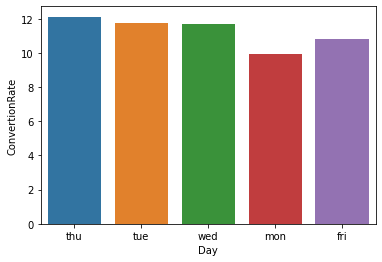

In [ ]:
sns.barplot(data = jumlahConversionday_of_week, x = jumlahConversionday_of_week.index, y = jumlahConversionday_of_week['ConvertionRate'])
plt.xlabel('Day');

Sementara untuk convertion rate dari segi hari bisa dikatakan cenderung sama karena semua conversion rate-nya berkisar pada 10 - 12% saja.

####Convertion Rate Berdasarkan Campaign

In [ ]:
jumlahConversioncampaign = df10[df10['y'] == 'yes']['campaign'].value_counts()
jumlahConversioncampaign = pd.DataFrame(jumlahConversioncampaign)
jumlahConversioncampaign['ConvertionRate'] = 0.0

for campaign in jumlahConversioncampaign.index:
    jumlahConversioncampaign['ConvertionRate'][campaign] = float(jumlahConversioncampaign['campaign'][campaign]/len(df10[df10['campaign'] == campaign])*100)

In [ ]:
jumlahConversioncampaign

,campaign,ConvertionRate
1,2300,13.037071
2,1211,11.456954
3,574,10.747051
4,249,9.392682
5,120,7.504690
6,75,7.660878
7,38,6.041335
8,17,4.250000
9,17,6.007067
10,12,5.333333


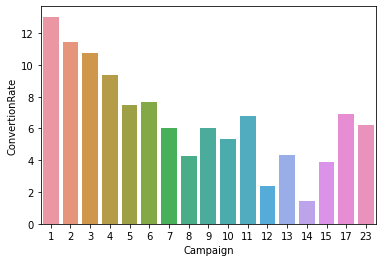

In [ ]:
sns.barplot(data = jumlahConversioncampaign, x = jumlahConversioncampaign.index, y = jumlahConversioncampaign['ConvertionRate'])
plt.xlabel('Campaign');

Untuk pengaruh frekuensi kontak calon nasabah, justru convertion rate tertinggi terjadi pada rentang frekuensi kontak calon nasabah terkecil dan makin menurun hingga frekuensi 8 kali kontak. Sementara setelah lebih dari 8 kali dikontak, distribusi convertion rate lebih bersifat random pada kisaran 6-7% saja.

####Convertion Rate Berdasarkan Previous Outcome

In [ ]:
jumlahConversionpoutcome = df10[df10['y'] == 'yes']['poutcome'].value_counts()
jumlahConversionpoutcome = pd.DataFrame(jumlahConversionpoutcome)
jumlahConversionpoutcome['ConvertionRate'] = 0.0

for poutcome in jumlahConversionpoutcome.index:
    jumlahConversionpoutcome['ConvertionRate'][poutcome] = float(jumlahConversionpoutcome['poutcome'][poutcome]/len(df10[df10['poutcome'] == poutcome])*100)

In [ ]:
jumlahConversionpoutcome

,poutcome,ConvertionRate
nonexistent,3141,8.832213
success,894,65.112891
failure,605,14.228598


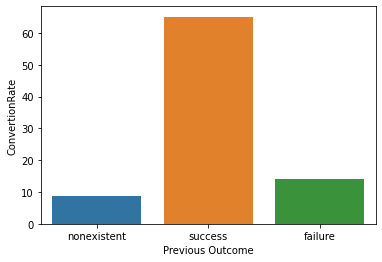

In [ ]:
sns.barplot(data = jumlahConversionpoutcome, x = jumlahConversionpoutcome.index, y = jumlahConversionpoutcome['ConvertionRate'])
plt.xlabel('Previous Outcome');

Untuk pengaruh dari hasil campaign sebelumnya, bisa kita lihat bahwa previous outcome yang success memiliki conversion rate paling tinggi, berarti target yang sebelumnya subscribe term deposit memiliki kecenderungan untuk subscribe term deposit lagi.

> ### **Conclusion and Recommendation.**

* **analysis :** conversion rate untuk target orang yang dihubungi dengan menggunakan panggilan seluler lebih tinggi dibandingkan telepon rumah. Hal ini bisa jadi diakibatkan karena akses untuk panggilan seluler lebih mudah, bisa dimana saja dan kapan saja dibandingkan dengan menggunakan telepon rumah yang tempatnya statis.
  * **rekomendasi :** Jika memungkinkan, promosi dilakukan dengan melakukan panggilan untuk pengguna telepon seluler daripada menggunakan telepon rumah (karena convertion rate %).

* **analysis :** Dari segi usia, conversion rate tertinggi berada diusia 60an ketas dan juga usia 30an kebawah. Yang berumur 60an keatas kemungkinan lebih cenderung ingin subscribe term deposit karena rendah resiko. Jika dibandingkan dengan investasi dalam bentuk lain seperti saham yang tinggi resiko, lebih masuk akal untuk deposito karena sumber dana-nya besar kemungkinan berasal dari dana pensiun. hal ini selaras dengan kolom `job` yang conversion rate-nya cukup tinggi adalah retired. Yang berumur 30an kebawah juga lebih memilih investasi deposito karena rendah resiko mengingat diusia segini biasanya penghasilan masih secukupnya dan kemungkinan masih belajar tentang investasi. Hal ini selaras dengan conversion rate student pada kolom `job` adalah yang tertinggi.
  * **recommendation :** untuk customer yang berumur dibawah 30 tahun, ketika kita melakukan promosi sebaiknya dilengkapi dengan penjelasan atau edukasi tentang investasi deposito yang aman tidak beresiko tinggi, karena usia dibawah 30an cenderung masih belum stabil secara finansial. Untuk customer yang berumur diatas 60 tahun, ketika kita melakukan promosi bisa juga ditawarkan dengan promo yang sesuai untuk rentang umur tersebut.


## Data Cleaning & Preparation

Sebelum data dimasukkan kedalam model Machine Learning, data yang kita miliki harus sudah siap untuk dimasukkan kedalam model. Memasukkan data yang belum diproses bisa membuat model Machine Learning yang akan dibangun memiliki performa yang tidak maksimal. Data Cleaning adalah membersihkan data dari data-data yang tidak diperlukan seperti data duplikat maupun kolom kosong (missing value). Data preprocessing adalah melakukan transformasi data seperti encoding atau scaling supaya performa Machine Learning menjadi lebih baik lagi ([source](https://deepchecks.com/what-is-data-cleaning/)).

###Duplicate

Terdapat 12 baris dari data kita yang merupakan duplikat data. Data duplikat ini akan dihapus karena merupakan informasi yang tidak kita butuhkan.

Data duplikat bisa mempengaruhi modeling terutama pada saat split data training testing. Data duplikat bisa muncul secara bersamaan pada data training dan data testing sehingga bisa membuat model menjadi bias.

([source](https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f)).

In [ ]:
# copy dataframe

df4 = df.copy()

In [ ]:
# check duplicate row look like

duplicateRows = df4[df4.duplicated()]
print(duplicateRows)

       age          job   marital            education  default housing loan  \
1266   39   blue-collar  married   basic.6y             no       no      no    
12261  36   retired      married   unknown              no       no      no    
14234  27   technician   single    professional.course  no       no      no    
16956  47   technician   divorced  high.school          no       yes     no    
18465  32   technician   single    professional.course  no       yes     no    
20216  55   services     married   high.school          unknown  no      no    
20534  41   technician   married   professional.course  no       yes     no    
25217  39   admin.       married   university.degree    no       no      no    
28477  24   services     single    high.school          no       yes     no    
32516  35   admin.       married   university.degree    no       yes     no    
36951  45   admin.       married   university.degree    no       no      no    
38281  71   retired      single    unive

In [ ]:
# remove duplicate data

df4.drop_duplicates(inplace=True)

In [ ]:
# check lagi apakah masih ada duplicate

duplicateRows = df4[df4.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]


###Outlier

Data outlier adalah data yang memiliki nilai abnormal yang sangat rendah atau sangat tinggi dibandingkan data yang lainnya. Sehingga bisa mempengaruhi hasil analisis statistik pada data dan membuat model menjadi kurang efektif. Data outlier ini perlu kita hapus agar model menjadi lebih efektif.

([source](https://www.freecodecamp.org/news/how-to-detect-outliers-in-machine-learning/)).

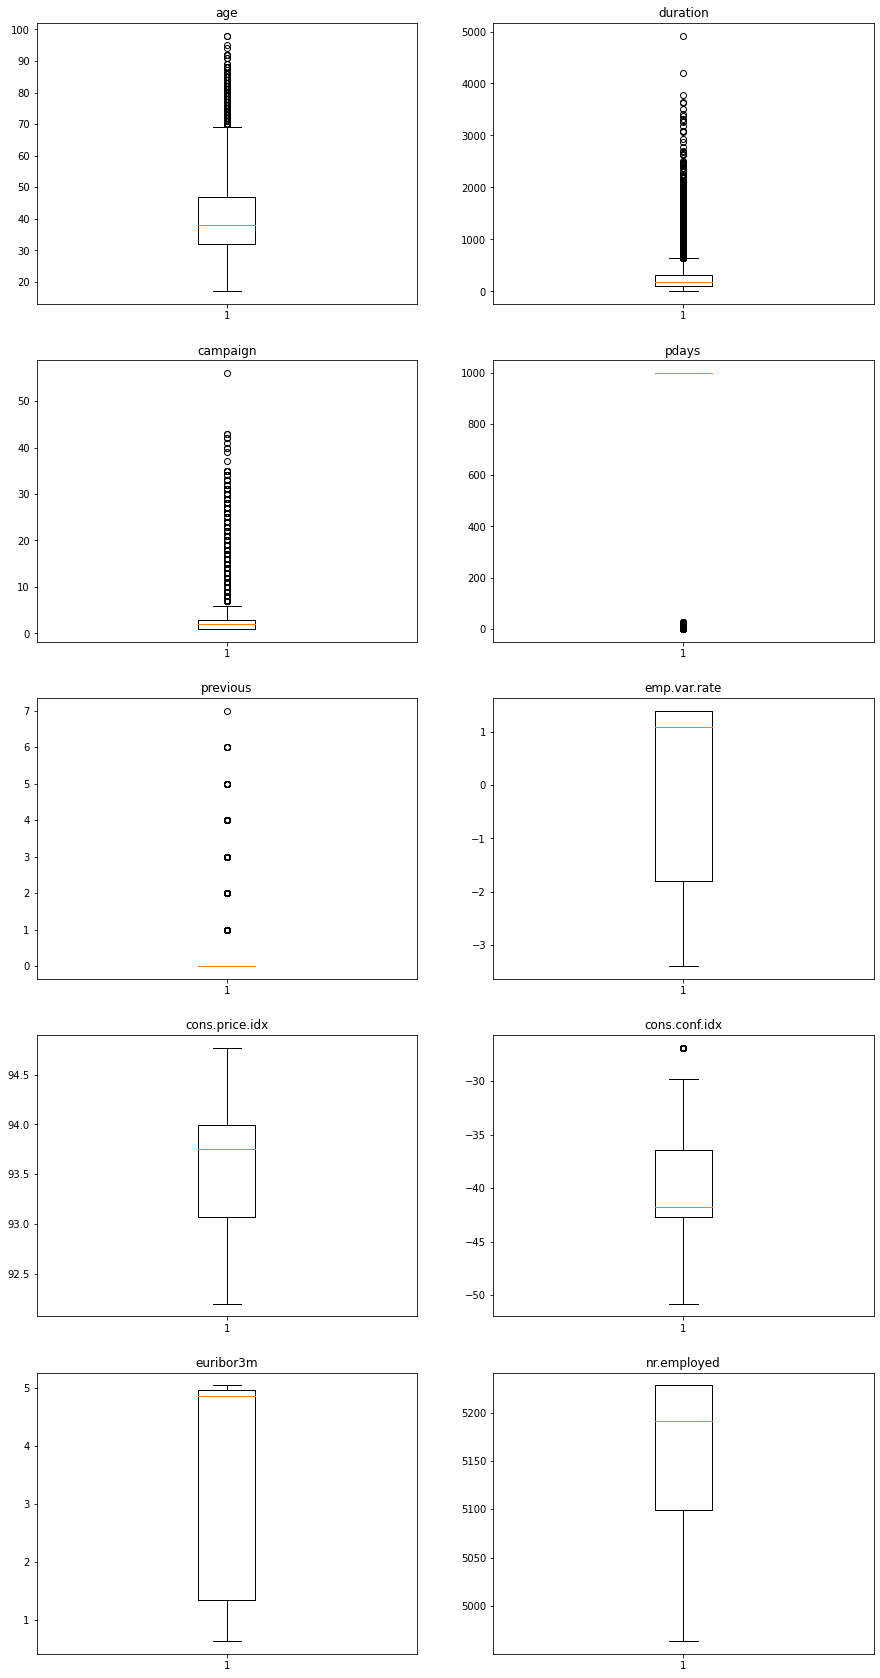

In [ ]:
cols = [
    "age",
    "duration",
    "campaign",
    "pdays",
    "previous",
    "emp.var.rate",
    "cons.price.idx",
    "cons.conf.idx",
    "euribor3m",
    "nr.employed"
]

i = 1

plt.figure(figsize = (15, 30))
for col in cols:
  ax = plt.subplot(5, 2, i)
  plt.boxplot(df4[col])
  ax.set_title(col)

  i += 1

Dari EDA yang telah dilakukan dapat dilihat untuk persebaran data age, campaign dan duration memiliki outlier. Kita remove data outlier dengan menggunakan metode IQR (Interquartile range) karena persebaran pada data age, campaign dan duration distribusinya tidak normal

In [ ]:
outlier=['age','campaign','duration']
for cols in outlier:
    Q1 = df4[cols].quantile(0.25)
    Q3 = df4[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df4[cols] >= Q1 - 1.5 * IQR) & (df4[cols] <= Q3 + 1.5 *IQR)
    df4=df4.loc[filter]

###Missing Value

Data missing value perlu diatasi dengan baik karena missing value akan sangat mempengaruhi performa dari model yang dibuat

Setelah kita cek menggunakan missingno tidak terdapat missing value

In [ ]:
# check persentage missing value

nan = df4.isna().sum()
nan = nan[nan != 0] * 100 / df.shape[0]
print(nan)

Series([], dtype: float64)


<AxesSubplot: >

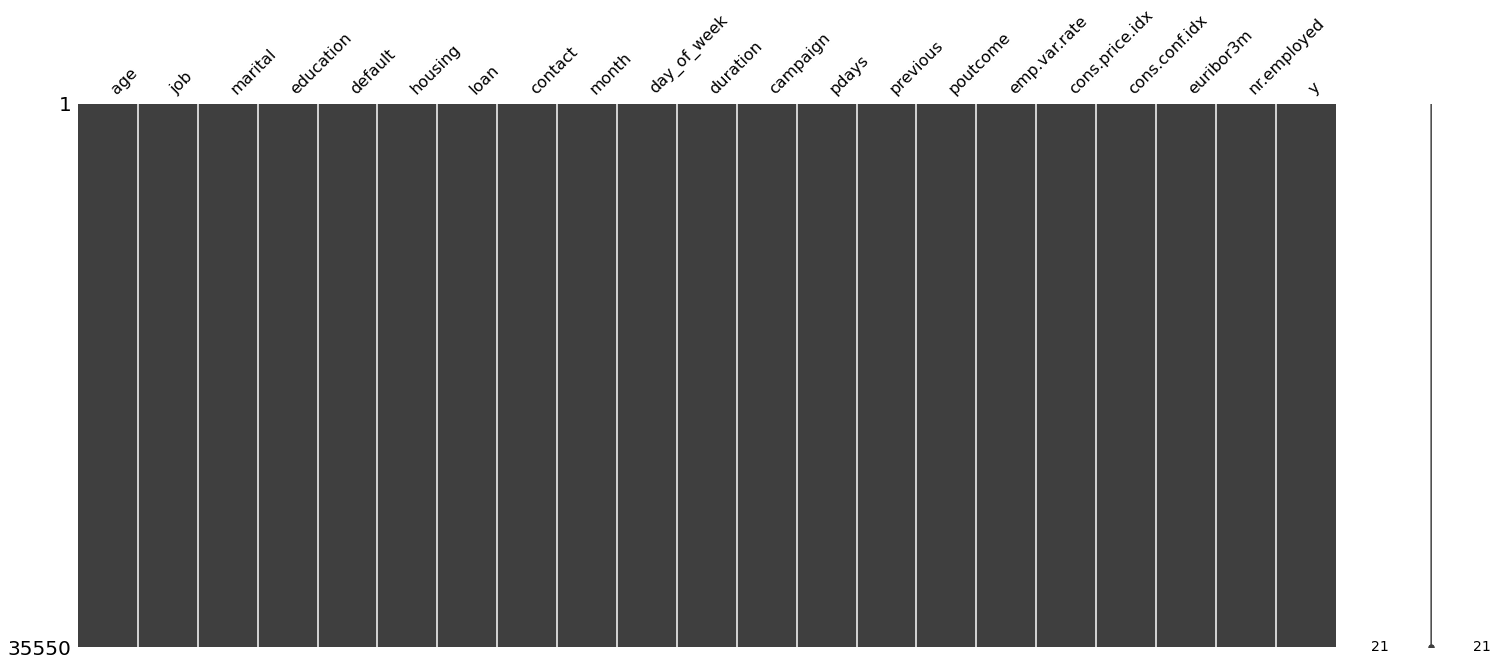

In [ ]:
missingno.matrix(df4)

### Feature Binning

Feature Binning adalah teknik untuk merubah data continous menjadi data kategorikal. Feature binning dapat membuat performa model menjadi lebih baik. ([referensi](([referensi](https://medium.com/geekculture/frequent-category-imputation-missing-data-imputation-technique-4d7e2b33daf7))))

In [ ]:
batas_bin = [0, 14, 24, 54, 65, 98]
kategori = ['0-14', '15-24', '25-54', '55-64', '65-98']
df4['AgeBin'] = pd.cut(df4['age'], bins=batas_bin, labels=kategori)

Kita buat fitur baru bernama AgeBin yang merupakan rentang umur dari fitur age. Pembagian rentang umur mengacu pada ([referensi](https://www.indexmundi.com/european_union/age_structure.html))

Kita buat fitur binning untuk data kategorikal sebagai berikut :

* job : paid dan unpaid.<br>
* marital : married and single.<br>
* education : illiterate, basic and high school, pendidikan lanjutan.<br>
* month : quartal.<br>

In [ ]:
# binning kolom job
df4["job"].replace({
    "housemaid" : "paid",
    "services" : "paid", 
    "admin." : "paid", 
    "blue-collar" : "paid", 
    "technician" : "paid",
    "retired" : "unpaid",
    "management" : "paid", 
    "unemployed" : "unpaid", 
    "self-employed" : "paid", 
    "entrepreneur" : "paid", 
    "student" : "unpaid"
},inplace = True)

In [ ]:
# binning kolom marital
df4["marital"].replace({
    "divorced" : "single"
}, inplace = True)

In [ ]:
# binning kolom month

df4["month"].replace({
    "mar" : "1st",
    "apr" : "2nd",
    "may" : "2nd",
    "jun" : "2nd",
    "jul" : "3rd",
    "aug" : "3rd",
    "sep" : "3rd",
    "oct" : "4th",
    "nov" : "4th",
    "dec" : "4th"
}, inplace = True)

In [ ]:
# binning kolom education

df4["education"].replace({
    "basic.4y" : "basic",
    "basic.6y" : "basic",
    "basic.9y" : "basic",
    "high.school" : "basic",
    "professional.course" : "advance",
    "university.degree" : "advance",
}, inplace = True)

Kemudian kita buat fitur binning untuk data numerikal previous dan pdays

In [ ]:
# Handling pdays

df4["pdays"] = df4["pdays"].replace({999 : 0})

In [ ]:
# handling previous

df4["previous"] = df4["previous"].apply(lambda x : "yes" if x > 0 else "no")

#### Numerical Fitur Binning

Kita dapat membuat binning untuk fitur numerikal dengan menggunakan `plt.hist`, `pd.cut` dan `pd.qcut` 
Fitur "emp.var.rate_bin", "cons.price.idx_bin", "cons.conf.idx_bin", "euribor3m_bin", "nr.employed_bin" kita bagi menjadi 5 bin (sumber : [towarddatascience](https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950))

(array([ 2499.,  8717.,   531.,  3367., 20436.]),
 array([-3.4 , -2.44, -1.48, -0.52,  0.44,  1.4 ]),
 <BarContainer object of 5 artists>)

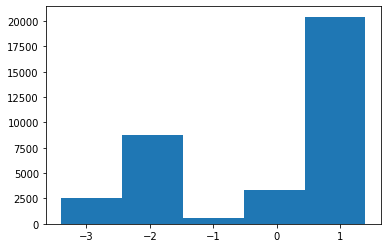

In [ ]:
plt.hist(df4['emp.var.rate'], bins=5)

In [ ]:
# bin kolom emp.var.rate

batas_bin = [-3.5 , -2.44, -1.48, -0.52,  0.44,  1.5]
kategori = ['A', 'B', 'C', 'D', 'E']
df4['emp.var.rate_bin']  = pd.cut(df4['emp.var.rate'], bins=batas_bin, labels=kategori)

In [ ]:
# bin kolom cons.price.idx

df4['cons.price.idx_bin'] = pd.qcut(
    df4['cons.price.idx'],
    q=[0, .2, .4, .6, .8, 1],
    labels=['A', 'B', 'C', 'D', 'E']
)

In [ ]:
# bin kolom cons.conf.idx

df4['cons.conf.idx_bin'] = pd.qcut(
    df4['cons.price.idx'],
    q=[0, .2, .4, .6, .8, 1],
    labels=['A', 'B', 'C', 'D', 'E']
)

In [ ]:
# bin kolom euribor3m

df4['euribor3m_bin'] = pd.qcut(
    df4['euribor3m'],
    q = [0, .2, .4, .6, .8, 1],
    labels = ['A', 'B', 'C', 'D', 'E']
)

(array([ 1703.,  1002.,  9042.,     0., 23803.]),
 array([4963.6, 5016.5, 5069.4, 5122.3, 5175.2, 5228.1]),
 <BarContainer object of 5 artists>)

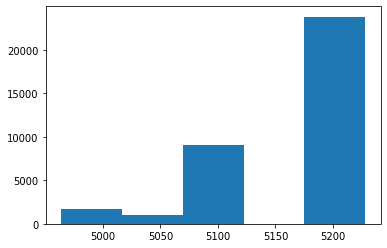

In [ ]:
plt.hist(df4['nr.employed'], bins=5)

In [ ]:
batas_bin = [4963.5, 5016.5, 5069.4, 5122.3, 5175.2, 5228.2]
kategori = ['A', 'B', 'C', 'D', 'E']
df4['nr.employed_bin']  = pd.cut(df4['nr.employed'], bins=batas_bin, labels=kategori)

### Drop Unused Column

Kita drop kolom age karena age sudah dibinning menjadi fitur baru yaitu AgeBin. Kita juga drop kolom duration karena memiliki korelasi yang paling tinggi terhadap target dibandingkan dengan kolom lainnya. Sehingga model prediksi akan lebih realistic apabila kolom duration yang bias tersebut tidak digunakan dalam model. Kita drop kolom "emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed" karena sudah dibinning menjadi fitur baru

In [ ]:
df4.drop(columns = ["age","duration","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"], inplace = True)

### Feature Selection

Feature selection adalah metode untuk mengurangi fitur dengan menggunakan kriteria tertentu untuk memilih fitur yang paling optimal pada model. Dengan menggunakan feature selection kita dapat mengurangi kompleksitas dari model yang dibuat ([source](([referensi](https://towardsdatascience.com/feature-selection-in-scikit-learn-dc005dcf38b7)))).

Menurut referensi ([source](([referensi](https://towardsdatascience.com/5-feature-selection-method-from-scikit-learn-you-should-know-ed4d116e4172)))) beberapa metode feature selection yang populer dan memiliki performa yang baik adalah RFE, Percentile, Select From Model dan Kbest. Dari beberapa metode tersebut kita dapat memilih metode yang paling cocok untuk model yang akan dibuat.

#### RFE

In [ ]:
rfe = RFE(BalancedRandomForestClassifier(), 
          n_features_to_select=8)

#### Percentile

In [ ]:
percentile = SelectPercentile(percentile=20)

#### Select From Model

In [ ]:
selectmodel = SelectFromModel(XGBClassifier(scale_pos_weight=100))

#### Kbest

In [ ]:
kbest = SelectKBest(k=8)

####Benchmark Feature Selection

In [ ]:
# fitur = [rfe, percentile, selectmodel, kbest]
# score_=[]
# score=[]

# recallscore_=[]
# recallscore=[]


# for i in fitur:
#     skfold=StratifiedKFold(n_splits=5)
#     estimator=Pipeline([
#         ('preprocess',transformer),
#         ('scaler', scaler),
#         ('featureselection', i),
#         ('model',LogisticRegression())])
#     estimator.fit(X_train, y_train)
#     y_predict = estimator.predict(X_test)
#     score_ = precision_score(y_test, y_predict)
#     score.append(score_)
#     recallscore_ = recall_score(y_test, y_predict)
#     recallscore.append(recallscore_)
    

# pd.DataFrame({'model':['RFE', 'percentile','select','kbest'],'precision':score,'recall':recallscore}).set_index('model').sort_values(by='precision',ascending=False)

,precision,recall
model,,
percentile,0.758865,0.185442
kbest,0.758865,0.185442
select,0.701422,0.256499
RFE,0.687179,0.232236


Dari benchmark yang dilakukan dapat dilihat bahwa kbest dan percentile memiliki nilai precision yang paling tinggi. Sehingga dapat kita pilih salah satunya. Yang akan kita gunakan dalam machine learning pipelin adalah select feature KBest.

### Encoding Pipeline

Feature Encoding adalah metode untuk mengubah data kategorikal menjadi numerikal. Kebanyakan model machine learning tidak bisa menerima data kategorikal sehingga perlu menggunakan feature encoding. ([source](https://towardsdatascience.com/feature-engineering-deep-dive-into-encoding-and-binning-techniques-5618d55a6b38)).

Feature scaling adalah metode yang digunakan untuk membuat masing-masing data numerical dalam rentang atau scale yang sama. Sehingga tidak ada fitur yang lebih mendominasi dari fitur lainnya karena scale yang digunakan sama.
([source](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)).

Beberapa teknik encoding dan scaling dapat disatukan dalam ColumnTransformer.


Preprocessing scenario untuk model machine learning adalah :

* Semua kolom numerik di scaling.
* one hot encoding : marital, housing, loan, contact, p_outcome.
* binary encoder : job, month, day_of_week, AgeBin, emp.var.rate_bin,cons.price.idx_bin,cons.conf.idx_bin,euribor3m_bin,nr.employed_bin
* label : education.

In [191]:
# one hot
onehot = OneHotEncoder(drop = "first",  handle_unknown = "ignore")
onehot_var = ["job", "marital", "default", "housing", "loan", "contact", "previous", "poutcome"]

# scaling
scaler = StandardScaler()
scale_var = [	
    "campaign",	
    "pdays", 
    # "emp.var.rate",
    # "cons.price.idx",
    # "cons.conf.idx",
    # "euribor3m",	
    # "nr.employed"
]

# label encoding for education
df4["education"].replace({
    "unknown" : 1,
    "illiterate" : 2,
    "basic" : 3,
    "advance" : 4 
}, inplace = True)

# binary
binary = ce.BinaryEncoder(handle_unknown = 'ignore')
binary_var = ["month", "day_of_week","AgeBin", "emp.var.rate_bin","cons.price.idx_bin","cons.conf.idx_bin","euribor3m_bin","nr.employed_bin"]

transformer = ColumnTransformer([
    # ("scale", scaler, scale_var),
    ("onehot", onehot, onehot_var),
    ("binary", binary, binary_var)
], remainder = "passthrough")

#"emp.var.rate_bin","cons.price.idx_bin","cons.conf.idx_bin","euribor3m_bin","nr.employed_bin"

###Split Data Training & Testing

Data kemudian dibagi dengan porsi 80% untuk training dan porsi 20% untuk testing

In [ ]:
X = df4.drop(columns = ['y'])
y = np.where(df4["y"] == "yes", 1, 0)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=0
)

##Modeling

Dari EDA yang telah dilakukan diketahui bahwa porsi data target untuk kelas Yes adalah sebesar 11,7% dan kelas No sebesar 88,3%. Dari proporsi tersebut terlihat jelas bahwa data tidak seimbang (imbalance). Sehingga untuk modeling kita memilih kandidat klasifier yang memiliki fitur class_weight atau scale_pos_weight yang dapat mengatur proporsi data untuk mengatasi permasalahan data tidak seimbang (imbalance). Kita juga memilih kandidat Balanced Random Forest yang mengimplementasikan teknik random undersampling pada data kelas yang paling banyak (majority class).

([referensi](https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/))

([referensi](https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/))

([referensi](https://machinelearningmastery.com/xgboost-for-imbalanced-classification/))

([referensi](https://machinelearningmastery.com/cost-sensitive-logistic-regression/))

###Benchmark Modelling (Tanpa Penalized) : Cross Validation 

Benchmark Modeling adalah mengukur performa dari beberapa model kandidat model yang dipilih untuk mengetahui model mana yang memiliki performa paling sesuai dengan tujuan machine learning ini dibuat. Metric yang digunakan untuk mengukur performa adalah precision dan model akan dinilai menggunakan metode cross validation sebanyak 5 fold. Benchmark ini menggunakan pipeline untuk mencegah terjadinya data leakage. ([referensi](https://towardsdatascience.com/pre-process-data-with-pipeline-to-prevent-data-leakage-during-cross-validation-e3442cca7fdc))




In [ ]:
rf = RandomForestClassifier()
logreg = LogisticRegression()
xgb = XGBClassifier()
balrf = BalancedRandomForestClassifier()

In [ ]:
models = [rf, logreg, xgb, balrf]
score=[]
rata=[]
std=[]


for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaling',scaler),
        ('featureselection', kbest),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='precision')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Random Forest', 'Logistic Regression','XGB','Balanced Random Forest'],'precision':rata,'sdev':std}).set_index('model').sort_values(by='precision',ascending=False)

,precision,sdev
model,,
Logistic Regression,0.707539,0.062901
XGB,0.685342,0.046415
Random Forest,0.678444,0.050426
Balanced Random Forest,0.232474,0.016707


###Benchmark Modelling (Penalized) : Cross Validation 

Benchmark Modeling adalah mengukur performa dari beberapa model kandidat model yang dipilih untuk mengetahui model mana yang memiliki performa paling sesuai dengan tujuan machine learning ini dibuat. Metric yang digunakan untuk mengukur performa adalah precision dan model akan dinilai menggunakan metode cross validation sebanyak 5 fold. Benchmark ini menggunakan pipeline untuk mencegah terjadinya data leakage. ([referensi](https://towardsdatascience.com/pre-process-data-with-pipeline-to-prevent-data-leakage-during-cross-validation-e3442cca7fdc))




In [185]:
rf = RandomForestClassifier(class_weight='balanced')
logreg = LogisticRegression(class_weight='balanced')
xgb = XGBClassifier(scale_pos_weight=estimate)
balrf = BalancedRandomForestClassifier()

In [188]:
models = [rf, logreg, xgb, balrf]
score=[]
rata=[]
std=[]


for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaling',scaler),
        ('featureselection', kbest),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='precision')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Random Forest', 'Logistic Regression','XGB','Balanced Random Forest'],'precision':rata,'sdev':std}).set_index('model').sort_values(by='precision',ascending=False)

,precision,sdev
model,,
Balanced Random Forest,0.232564,0.016752
XGB,0.232382,0.016667
Random Forest,0.231585,0.016630
Logistic Regression,0.224017,0.015645


###Benchmark Test Data

Benchmark test data bertujuan untuk mengetahui performa model yang telah ditraining menggunakan data training terhadap data test. Sehingga dari benchmark ini dapat diketahui model yang memiliki performa paling baik dan cocok digunakan untuk mencapai tujuan machine learning. Benchmark Test Data dilakukan dengan dua skenario yaitu dengan menggunakan class_weight / scale_pos_weight dan tanpa menggunakan class_weight / scale_pos_weight. Skenario dilakukan untuk megetahui pengaruh dari class_weight / scale_pos_weight dalam menangani klasifikasi dataset imbalance

([referensi](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7))

####Benchmark Test Data Tanpa Penalized

In [234]:
rf = RandomForestClassifier()
logreg = LogisticRegression()
xgb = XGBClassifier()
balrf = BalancedRandomForestClassifier()

In [223]:
models = [rf, logreg, xgb, balrf]
score_=[]
score=[]

recallscore_=[]
recallscore=[]


for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaling',scaler),
        ('featureselection', kbest),
        ('model',i)])
    estimator.fit(X_train, y_train)
    y_predict = estimator.predict(X_test)
    score_ = precision_score(y_test, y_predict)
    score.append(score_)
    recallscore_ = recall_score(y_test, y_predict)
    recallscore.append(recallscore_)
    

pd.DataFrame({'model':['Random Forest', 'Logistic Regression','XGB','Balanced Random Forest'],'precision':score,'recall':recallscore}).set_index('model').sort_values(by='precision',ascending=False)

,precision,recall
model,,
Balanced Random Forest,0.245435,0.792028
Logistic Regression,0.245040,0.792028
XGB,0.244909,0.792028
Random Forest,0.244468,0.785095


Dari benchmark yang dilakukan dapat dilihat bahwa rata-rata recall tinggi dan precision rendah pada skenario dengan menggunakan class_weight / scale_pos_weight. Sedangkan rata-rata recall rendah dan precision tinggi pada skenario tanpa menggunakan class_weight / scale_pos_weight.

####Benchmark Test Data Dengan Penalized

In [ ]:
# scale_pos_weight estimate for XGBClassifier
from collections import Counter
counter = Counter(y)
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 11.327


In [233]:
rf = RandomForestClassifier(class_weight='balanced')
logreg = LogisticRegression(class_weight='balanced')
xgb = XGBClassifier(scale_pos_weight=estimate)
balrf = BalancedRandomForestClassifier()

In [ ]:
models = [rf, logreg, xgb, balrf]
score_=[]
score=[]

recallscore_=[]
recallscore=[]


for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaling',scaler),
        ('featureselection', kbest),
        ('model',i)])
    estimator.fit(X_train, y_train)
    y_predict = estimator.predict(X_test)
    score_ = precision_score(y_test, y_predict)
    score.append(score_)
    recallscore_ = recall_score(y_test, y_predict)
    recallscore.append(recallscore_)
    
pd.DataFrame({'model':['Random Forest', 'Logistic Regression','XGB','Balanced Random Forest'],'precision':score,'recall':recallscore}).set_index('model').sort_values(by='recall',ascending=False)

,precision,recall
model,,
Logistic Regression,0.245040,0.792028
XGB,0.244909,0.792028
Balanced Random Forest,0.245435,0.792028
Random Forest,0.243652,0.781629


###Hyperparameter Tuning

Dari benchmark yang telah dilakukan terlihat bahwa memiliki nilai precision paling tinggi dibandingkan yang lain. Sehingga model inilah yang akan kita pakai untuk membuat model machine learning yang mampu memprediksi calon nasabah

Model ini dapat kita tuning parameternya dengan tujuan untuk meningkatkan precision. Metode untuk Hyperparameter Tuning ini adalah menggunakan randomized_search 

([referensi](https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663))

####Sebelum Hyperparameter Tuning

In [236]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('scaling',scaler),
    ('featureselection', kbest),
    ('model', logreg)])

In [237]:
estimator.fit(X_train, y_train)
y_predict = estimator.predict(X_test)

In [238]:
print('RocAuc Score ', roc_auc_score(y_test, y_predict))
print('Recall Score ',recall_score(y_test, y_predict))
print('Precision Score ',precision_score(y_test, y_predict))
print('F1 Score ',f1_score(y_test, y_predict))

RocAuc Score  0.590118796956977
Recall Score  0.1854419410745234
Precision Score  0.7588652482269503
F1 Score  0.298050139275766


Sebelum Hyperparameter Tuning didapatkan precision score sebesar 0.75886

####Setelah Hyperparameter Tuning

In [208]:
# params = { 'model__max_depth': [3, 5, 6, 10, 15, 20],
#            'model__learning_rate': [0.01, 0.1, 0.2, 0.3],
#            'model__subsample': np.arange(0.5, 1.0, 0.1),
#            'model__colsample_bytree': np.arange(0.4, 1.0, 0.1),
#            'model__colsample_bylevel': np.arange(0.4, 1.0, 0.1),
#            'model__n_estimators': [100, 500, 1000]}

In [239]:
params = {'model__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
          'model__penalty' : ['l2'],
          'model__C' : [100, 10, 1.0, 0.1, 0.01]}

In [240]:
randomized_search = RandomizedSearchCV(
    estimator, # model to tune
    param_distributions = params, # hyperparameter space
    n_iter = 20,
    cv = 5, # evaluation method
    scoring = 'precision', # metrics
    random_state = 0,
    n_jobs = -1 # use all cores
)

In [241]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['job',
                                                                                'marital',
                                                                                'default',
                                                                                'housing',
                                                                                'loan',
                                                               

In [242]:
print('best param',randomized_search.best_params_)

best param {'model__solver': 'newton-cg', 'model__penalty': 'l2', 'model__C': 100}


In [243]:
randomized_search.best_estimator_.fit(X_train,y_train)
y_pred_tune = randomized_search.best_estimator_.predict(X_test)
print('RocAuc Score ', roc_auc_score(y_test, y_pred_tune))
print('Recall Score ',recall_score(y_test, y_pred_tune))
print('Precision Score ',precision_score(y_test, y_pred_tune))
print('F1 Score ',f1_score(y_test, y_pred_tune))

RocAuc Score  0.590118796956977
Recall Score  0.1854419410745234
Precision Score  0.7588652482269503
F1 Score  0.298050139275766


Setelah Hyperparameter Tuning didapatkan precision score sebesar 0.75886

###Classification Report

Classification Report digunakan untuk evaluasi model berisi Data Detail Tentang Precision, Recall dan F1 Score

In [244]:
print(classification_report(y_test,y_pred_tune))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6533
           1       0.76      0.19      0.30       577

    accuracy                           0.93      7110
   macro avg       0.85      0.59      0.63      7110
weighted avg       0.92      0.93      0.91      7110



###Confusion Matrix

Confusion matrix digunakan untuk evaluasi model berisi Data Detail Tentang Persebaran True Positive, True Negative, False Positif dan False Negatif

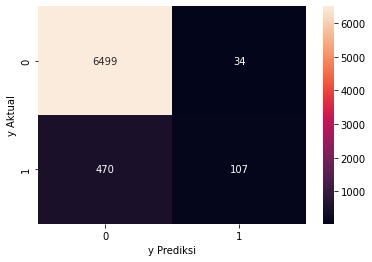

In [245]:
sns.heatmap(confusion_matrix(y_test, y_pred_tune), annot=True, fmt='.0f')
plt.xlabel('y Prediksi');
plt.ylabel('y Aktual');

###Feature Importance

Feature Importance adalah nilai dari masing-masing fitur terhadap model. Semakin tinggi nilai dari suatu fitur maka akan semakin besar efeknya terhadap performa dari sebuah model.

https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285#:~:text=Feature%20Importance%20refers%20to%20techniques,to%20predict%20a%20certain%20variable

In [246]:
feature_names = randomized_search.best_estimator_.named_steps["preprocess"].get_feature_names()

In [247]:
coefs = randomized_search.best_estimator_.named_steps["model"].coef_[0]

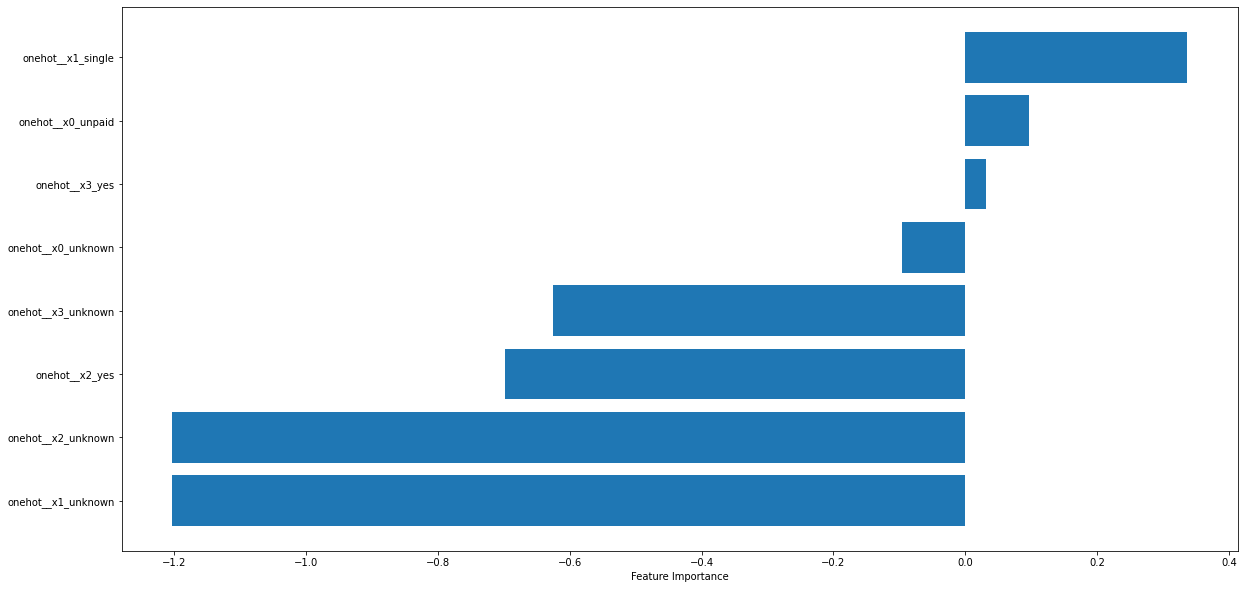

In [248]:
plt.figure(figsize=(20, 10))
sorted_idx = coefs.argsort()
plt.barh(np.array(feature_names)[sorted_idx], coefs[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

Pada grafik dapat dilihat fitur-fitur yang memiliki nilai Feature Importance terhadap model

##Conclusion & Recommendation

*   Model ini hanya bisa digunakan untuk data ditahun 2008 sampai 2013. Karena untuk saat ini kondisi tersebut sudah tidak relevan. Perkembangan teknologi memungkinkan kegiatan marketing dilakukan melalui sosial media, telepone, affiliate dan sebagainya.
*   Unsupervised fitur binning dapat meningkatkan performa secara signifikan
sehingga disarankan untuk menggunakan supervised feature binning seperti binning dengan menggunakan decision tree
*   Pada dataset ini Penalized Model dengan parameter class_weight / scale_pos_weight kurang cocok digunakan untuk membuat model yang membutuhkan precision tinggi sehingga Penalized Model dengan class_weight / scale_pos_weight lebih cocok digunakan untuk membuat model yang membutuhkan recall tinggi
*   Precision akan lebih bagus ketika data sangat spesifik karena positif rate diawal 10,2% sementara setelah modeling menjadi 75% Maka model ini lebih profitable lebih 7.4 kali.
*   Permodelan untuk tahun 2021 keatas lebih baik menggunakan recall karena return saham sudah lebih baik average return 21 % daripada tahun krisis 2008.




referensi
https://stats.stackexchange.com/questions/475386/what-does-penalize-a-learning-algorithm-mean-in-machine-learning
https://www.akkio.com/post/precision-vs-recall-how-to-use-precision-and-recall-in-machine-learning-complete-guide



### Simulasi Cost & Benefit (After Modelling)

Sebelum melakukan perhitungan Cost and Benefit, pertama-tama dilakukan perhitungan kemampuan kerja manpower dalam satu hari kerja:

*   Asumsi productivity manpower Work From Office minimum 29.8% (2 jam 23 menit) sampai 60% (4 jam 48 menit) sehingga rata-rata productivity manpower 44.9% (berdasarkan [Sumber](https://www.apollotechnical.com/employee-productivity-statistics/)).
*   Asumsi productivity manpower Work From Home / Freelancer (7 jam 12 menit, karena jam kerja dari rumah 36 jam per minggu 5 hari kerja) sehingga rata-rata productivity manpower 90.0% (berdasarkan [Sumber](https://www.apollotechnical.com/employee-productivity-statistics/))
*   Asumsi untuk analisa ini adalah productivity manpower work from office karena pada tahun 2008-2013 belum ada work from home [Sumber](https://www.apollotechnical.com/employee-productivity-statistics/)).

Cost telemarketing terdiri dari beberapa elemen yaitu 
*   Asumsi menggunakan vodafone karena operator terbaik di portugal (berdasarkan [Sumber](https://www.phonetravelwiz.com/vodafone-portugal-review/)). Biaya komunikasi telepon atau seluler (EUR 7.55 per jam) (berdasarkan [Sumber](https://www.smartone.com/mo/en/mobile-services/roaming/countryDetails.jsp?country_name=Portugal))
*   Manpower telemarketer (EUR 60 per 8 jam) ([Source](https://www.guru.com/d/freelancers/skill/telemarketing/l/portugal/))
* Total Cost per hari = Cost Manpower Telemarketer + (Cost biaya telekomunikasi/hari * efisiensi kerja manpower * jam kerja) = EUR 60 + (EUR 7,55 * 44,9% * 8) = EUR 87,1196 per hari


Sementara, revenue dari lini bisnis deposito bank dihitung berdasarkan elemen-elemen dan perhitungan berikut :

* Kemampuan call perhari (offline) = productivity manpower (44.9%) * Jam Kerja (8 jam)(480 menit) / median duration (180 detik = 3 menit)  = 44.9% * 480 menit / 3 menit = 71,84 panggilan

* Productivity = prosentase jumlah customer subscribe * kemampuan call perhari = 75% * 71,84 = 53,88 customer/hari -> dengan 20 hari kerja per bulan, maka productivity menjadi 1078 nasabah baru/bulan dan .

Dari 156 nasabah baru tersebut, kita asumsikan nasabah deposito berlangganan dengan rata-rata investasi dari range EUR 940 - EUR 4700 yaitu EUR 2800 (). Kemudian, kita asumsikan bank meenginvestasikan uang dari 50% jumlah nasabah tersebut dalam mencari profit melalui net interest margin (sebesar = 1,25%, [Source](https://www.mdpi.com/2071-1050/11/14/3785)) dan 50% lainnya diinvestasikan di pasar saham, namun dikarenakan sudah terlanjur investasi dilakukan pada pasar saham, bank mengalami kerugian rata-rata sebesar 11% pertahun ([Source](https://tradingeconomics.com/portugal/stock-market-return-percent-year-on-year-wb-data.html)), sehingga dilakukan pembobotan untuk masing-masing dari skema tersebut.